## TP4
### Question 1.2
On a intérêt à changer de porte. Cela nous proccure une probabilité de gain de 2/3 comparé à 1/3 dans le cas où l'on ne changerait pas.

### 2. Faisons le calcul
#### 1.

In [17]:
from random import randint
def games1000():
    win = 0
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            win+=1
    print(win)

games1000()

326


#### 2.

In [8]:
from random import randint
from random import choice

def games1000():
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            print(choice([i for i in range(0,3) if i not in [player_door]]))

games1000()

2
0
1
2
2
2
2
1
1
1
1
1
2
1
0
0
1
1
0
2
2
0
0
2
1
2
0
0
0
1
1
1
0
1
0
1
0
1
2
0
0
1
2
0
1
0
2
0
2
0
1
1
1
0
2
2
1
1
0
0
2
0
0
0
1
1
0
2
1
0
2
1
1
2
0
2
2
2
2
0
1
1
1
2
0
0
1
2
1
1
0
1
0
1
2
2
1
1
0
1
0
1
2
1
0
2
2
0
1
2
0
0
0
2
1
2
2
1
0
2
1
0
1
1
0
1
1
2
0
2
0
2
0
2
2
0
0
0
1
1
2
1
1
0
0
1
2
2
2
1
0
2
0
1
1
1
1
0
1
2
0
2
1
1
0
1
1
2
1
1
1
2
2
0
0
1
1
1
0
1
1
0
1
2
1
0
0
0
0
1
1
0
1
2
1
1
2
1
2
1
2
2
1
1
2
1
0
1
1
2
2
1
1
2
1
1
2
2
2
0
0
0
1
2
2
2
0
1
2
0
2
2
0
1
1
0
1
2
0
0
2
1
2
0
2
0
1
2
1
1
2
2
1
1
1
2
2
1
1
1
0
0
0
0
0
1
1
2
2
1
0
2
2
1
0
2
2
2
1
2
2
2
0
0
2
2
1
2
0
0
1
1
1
2
1
0
0
1
2
1
0
0
0
0
0
0
1
0
1
2
0
0
1
2
1
1
0
0
1
1
0
2
1
2
0
2
1
2
2


#### 3 et 4

In [19]:
from random import randint
from random import choice

def games1000(strat):
    win = 0
    for i in range(1000):
        winning_door = randint(0,2)
        player_door  = randint(0,2)
        if(winning_door == player_door):
            open_door = (choice([i for i in range(0,3) if i not in [player_door]]))
        else:
            open_door = choice([i for i in range(0,3) if i not in [player_door, winning_door]])
        if(strat==2):
            player_door = choice([i for i in range(0,3) if i not in [player_door, open_door]])
        if(winning_door==player_door):
                win+=1
    print('Strat {0} won {1} times /1000'.format(strat, win))     

games1000(1)
games1000(2)


Strat 1 won 330 times /1000
Strat 2 won 657 times /1000


### 3. Avec un ordinateur quantique


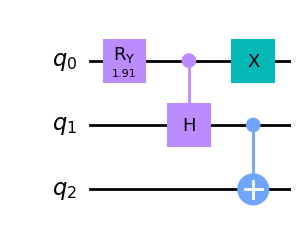

In [60]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
pi = 3.14
circuit = QuantumCircuit(3, 0)
circuit.ry(pi/1.644,0)
circuit.ch(0,1)
circuit.cx(1,2)
circuit.x(0)
circuit.draw('mpl')

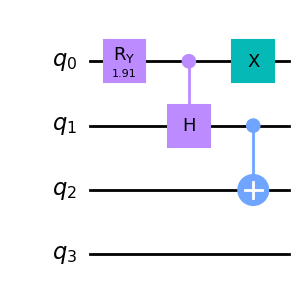

In [63]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
pi = 3.14
circuit = QuantumCircuit(4, 0)
circuit.ry(pi/1.644,0)
circuit.ch(0,1)
circuit.cx(1,2)
circuit.x(0)
circuit.draw('mpl')

### Décision de Monty
Le joueur choisi toujours la porte 3 (ou 2 si on compte à partir de 0), dans le cas où le gain se trouve derrière la porte 0, alors Monty doit ouvrir la porte 1, on place donc une porte CX sur le qubit 0. 
Si le qubit 0 est à 1, alors la décision de monti sera d'ouvrir la porte 1 (la seconde). Dans le cas ou le gain est derrière la porte 1, alors la grâce à la porte CX monty ouvrira la porte 0.
Enfin, le dernier cas est celui où le gain se trouve derrière la porte 2, celle que le joueur à choisi.
Monty peut donc ouvrir l'une des deux premières. Pour cela on place une porte CH sur le troisième qubit, ce qui permet de couvrir toutes les possibilités dans le cas où le gain se trouve derrière la porte choisie par le joueur.

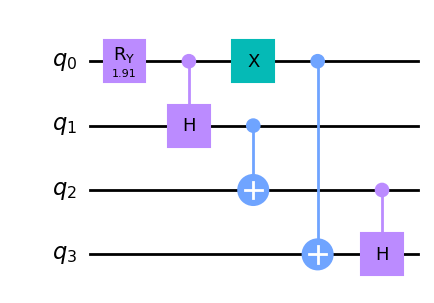

In [65]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
pi = 3.14
circuit = QuantumCircuit(4, 0)
circuit.ry(pi/1.644,0)
circuit.ch(0,1)
circuit.cx(1,2)
circuit.x(0)
circuit.cx(0,3)
circuit.ch(2,3)
circuit.draw('mpl')